In [251]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

In [336]:
df1=pd.read_csv('googleplaystore.csv')

In [252]:
df=pd.read_csv('googleplaystore.csv')

In [253]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [254]:
df.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [255]:
df['Installs']=df['Installs'].str.replace('+','')

In [256]:
df['Installs']=df['Installs'].str.replace(',','')

In [257]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
5           50000
6           50000
7         1000000
8         1000000
9           10000
10        1000000
11        1000000
12       10000000
13         100000
14         100000
15           5000
16         500000
17          10000
18        5000000
19       10000000
20         100000
21         100000
22         500000
23         100000
24          50000
25          10000
26         500000
27         100000
28          10000
29         100000
           ...   
10811         100
10812        1000
10813       10000
10814       50000
10815      500000
10816         100
10817      100000
10818       10000
10819        5000
10820        1000
10821          50
10822          10
10823         100
10824       10000
10825         100
10826     5000000
10827        5000
10828       10000
10829       10000
10830      100000
10831        5000
10832      100000
10833        1000
10834         500
10835     

In [258]:
df.iloc[10472]['Installs']=='0'

False

In [259]:
df.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [260]:
df['Installs'][10472]='0'

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [261]:
df['Installs']=df['Installs'].astype(float)

In [262]:
df.isnull().values.any()

True

In [263]:
df.fillna(0)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000.0,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000.0,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000.0,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [264]:
df.drop(["Current Ver","Android Ver"],axis=1,inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0,Everyone,Art & Design,"March 26, 2017"
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000.0,Free,0,Everyone,Art & Design,"April 26, 2018"
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000.0,Free,0,Everyone,Art & Design,"June 14, 2018"
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0,Everyone,Art & Design,"September 20, 2017"
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000.0,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018"


In [265]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
dtype: int64

In [266]:
m = df[df['Installs']>50000]['Installs'].mean()

In [267]:
 df[df['Installs']>50000]['Rating']

1        3.9
2        4.7
3        4.5
4        4.3
7        4.1
8        4.4
10       4.4
11       4.4
12       4.2
13       4.6
14       4.4
16       4.7
18       4.3
19       4.6
20       4.0
21       4.1
22       4.7
23       NaN
26       4.7
27       4.1
29       4.1
30       4.2
32       4.5
33       4.2
35       3.8
36       4.7
37       4.1
39       4.0
41       4.5
42       4.4
        ... 
10729    4.3
10731    3.9
10732    4.3
10739    3.6
10740    4.3
10741    4.2
10750    4.2
10753    4.5
10758    4.1
10765    3.4
10766    2.9
10770    4.0
10777    3.9
10781    4.3
10784    4.3
10792    4.2
10793    4.4
10795    4.2
10796    4.7
10797    4.6
10799    4.7
10803    4.3
10804    4.2
10809    4.7
10815    4.2
10817    4.0
10826    4.0
10830    3.8
10832    3.8
10840    4.5
Name: Rating, Length: 6119, dtype: float64

In [268]:
def bytes(KB):
    bytes=KB*1024
    return bytes
if __name__=="__main__":
    KB=1
    print(KB,"KB=",bytes(KB),"bytes")

1 KB= 1024 bytes


In [23]:
def bytes(MB):
    bytes=KB**2
    return bytes
if __name__=="__main__":
    MB=1
    print(MB,"MB=",bytes(MB),"bytes")

1 MB= 1 bytes


In [355]:
def f1(data):
#     data = str(data)
    if 'M' in data:
        return float(data[:-1])*1024*1024
    elif 'k' in data:
        return float(data[:-1])*1024
    else:
        
        return float(data)

In [356]:
df['Size'] = df1['Size']

In [357]:
df['Size']=df['Size'].str.replace('Varies with device','0')

In [348]:
list(map(f1,df['Size']))

[19922944.0,
 9646899.2,
 25165824.0,
 0.0,
 11534336.0,
 9856614.4,
 15728640.0,
 10485760.0,
 0.0,
 1258291.2,
 12582912.0,
 25165824.0,
 27262976.0,
 8388608.0,
 8283750.4,
 8598323.2,
 8074035.2,
 1258291.2,
 3040870.4,
 3774873.6,
 26214400.0,
 3879731.2,
 6186598.4,
 4718592.0,
 0.0,
 3670016.0,
 9017753.6,
 3670016.0,
 4613734.4,
 5872025.6,
 4404019.2,
 11534336.0,
 1992294.4,
 5452595.2,
 2831155.2,
 38797312.0,
 30408704.0,
 19922944.0,
 14680064.0,
 9122611.2,
 26214400.0,
 2936012.8,
 5872025.6,
 11534336.0,
 22020096.0,
 20971520.0,
 34603008.0,
 3250585.6,
 12582912.0,
 29360128.0,
 6291456.0,
 26214400.0,
 12582912.0,
 4404019.2,
 6396313.6,
 7340032.0,
 4823449.6,
 14680064.0,
 24117248.0,
 4404019.2,
 40894464.0,
 9646899.2,
 17825792.0,
 5767168.0,
 32505856.0,
 6606028.8,
 24117248.0,
 92274688.0,
 16777216.0,
 101711872.0,
 13631488.0,
 9437184.0,
 4823449.6,
 44040192.0,
 35651584.0,
 5033164.8,
 1782579.2,
 2936012.8,
 18874368.0,
 60817408.0,
 69206016.0,
 199229

In [328]:
l1 = df[df['Size']==''].index.tolist()

In [329]:
l1

[]

In [327]:
df['Size'].loc[l1]=0

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [271]:
df['Size'].iloc[l1]='0'

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [272]:
#df['Size']=df['Size'].str.replace('+','')

In [273]:
#df['Size']=df['Size'].str.replace(',','')

In [274]:
#df['Size']=df['Size'].str.replace('Varies with device','')

In [275]:
#df['Size']=df['Size'].map(lambda x:x.rstrip('M'))
#df['Size']=df['Size'].map(lambda x:str(round((float(x.rstrip('k'))/1024),1))if x[-1]=='k'
df['Size']=df['Size'].map(lambda x:np.nan if x.startswith('Varies') else x)

In [316]:
list(map(f1,df['Size']))

ValueError: could not convert string to float: 

In [277]:
df['Size']

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
5        5.6M
6         19M
7         29M
8         33M
9        3.1M
10        28M
11        12M
12        20M
13        21M
14        37M
15       2.7M
16       5.5M
17        17M
18        39M
19        31M
20        14M
21        12M
22       4.2M
23       7.0M
24        23M
25       6.0M
26        25M
27       6.1M
28       4.6M
29       4.2M
         ... 
10811    3.9M
10812     13M
10813    2.7M
10814     31M
10815    4.9M
10816    6.8M
10817    8.0M
10818    1.5M
10819    3.6M
10820    8.6M
10821    2.5M
10822    3.1M
10823    2.9M
10824     82M
10825    7.7M
10826        
10827     13M
10828     13M
10829    7.4M
10830    2.3M
10831    9.8M
10832    582k
10833    619k
10834    2.6M
10835    9.6M
10836     53M
10837    3.6M
10838    9.5M
10839        
10840     19M
Name: Size, Length: 10841, dtype: object

In [358]:
df['Size'] = df['Size'].apply(lambda x: f1(x))

In [359]:
df['Size'].value_counts()

0.0           1695
11534336.0     198
12582912.0     196
14680064.0     194
13631488.0     191
15728640.0     184
17825792.0     160
19922944.0     154
16777216.0     149
27262976.0     149
10485760.0     146
26214400.0     143
20971520.0     139
22020096.0     138
25165824.0     136
18874368.0     133
24117248.0     117
23068672.0     114
30408704.0     103
28311552.0      97
29360128.0      95
31457280.0      84
34603008.0      79
3460300.8       77
38797312.0      76
36700160.0      72
32505856.0      70
3040870.4       69
2411724.8       68
2621440.0       67
              ... 
124928.0         1
894976.0         1
973824.0         1
248832.0         1
496640.0         1
961536.0         1
359424.0         1
857088.0         1
225280.0         1
790528.0         1
733184.0         1
315392.0         1
803840.0         1
439296.0         1
885760.0         1
712704.0         1
239616.0         1
699392.0         1
860160.0         1
633856.0         1
197632.0         1
95232.0     

In [280]:
Type_null=df[df['Type'].isnull()].index.tolist()
print(Type_null)

[9148]


In [281]:
df['Type'].iloc[Type_null]="Free"

In [282]:
# check if field
from collections import Counter
print(sum(df['Type'].isnull()))# ok done
Counter(df['Type'])

0


Counter({'Free': 10040, 'Paid': 800, '0': 1})

In [283]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
dtype: int64

In [284]:
df['Installs']=df['Installs'].map(lambda x:x.rstrip('+'))
df['Installs']=df['Installs'].map(lambda x:''.join(x.split(',')))

AttributeError: 'float' object has no attribute 'rstrip'

In [285]:
df['Price']=df['Price'].map(lambda x:x.lstrip('$').rstrip())

In [286]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0,Everyone,Art & Design,"March 26, 2017"
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000.0,Free,0,Everyone,Art & Design,"April 26, 2018"
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000.0,Free,0,Everyone,Art & Design,"June 14, 2018"
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0,Everyone,Art & Design,"September 20, 2017"
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000.0,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018"


In [287]:
# row 10472 removed due to missing values of category
df.drop(df.index[10472],inplace=True)

In [288]:
# row[7312,8266] removed due to unrated values in content rating
df.drop(df.index[[7312,8266]],inplace=True)

In [289]:
#sort by category
df.sort_values("Category",inplace=True)

In [290]:
# label encoding
lb=LabelEncoder()

In [291]:
#create columns for numeric content rating
df["Content Rating NUM"]=lb.fit_transform(df["Content Rating"])
# from dict for content rating and numeric values
dict_Content_rating={"Adults only 18+":0,"Everyone":1,"Everyone 10+":2,"Mature 17+":3,"Teen":4}
dict_Content_rating

{'Adults only 18+': 0,
 'Everyone': 1,
 'Everyone 10+': 2,
 'Mature 17+': 3,
 'Teen': 4}

In [292]:
# create columns for numeric category
df["Category NUM"]=lb.fit_transform(df["Category"])
#from dict for category and numeric values
dict_category={}
value=0
for i in df["Category"].unique():
    dict_category[i]=value
    value+=1
dict_category    

{'ART_AND_DESIGN': 0,
 'AUTO_AND_VEHICLES': 1,
 'BEAUTY': 2,
 'BOOKS_AND_REFERENCE': 3,
 'BUSINESS': 4,
 'COMICS': 5,
 'COMMUNICATION': 6,
 'DATING': 7,
 'EDUCATION': 8,
 'ENTERTAINMENT': 9,
 'EVENTS': 10,
 'FAMILY': 11,
 'FINANCE': 12,
 'FOOD_AND_DRINK': 13,
 'GAME': 14,
 'HEALTH_AND_FITNESS': 15,
 'HOUSE_AND_HOME': 16,
 'LIBRARIES_AND_DEMO': 17,
 'LIFESTYLE': 18,
 'MAPS_AND_NAVIGATION': 19,
 'MEDICAL': 20,
 'NEWS_AND_MAGAZINES': 21,
 'PARENTING': 22,
 'PERSONALIZATION': 23,
 'PHOTOGRAPHY': 24,
 'PRODUCTIVITY': 25,
 'SHOPPING': 26,
 'SOCIAL': 27,
 'SPORTS': 28,
 'TOOLS': 29,
 'TRAVEL_AND_LOCAL': 30,
 'VIDEO_PLAYERS': 31,
 'WEATHER': 32}

In [293]:
# replace nan value with mean
from sklearn.impute import SimpleImputer
impute=SimpleImputer()
df['Rating']=impute.fit_transform(df[['Rating']])
df['Rating'].round(1)
df.dropna(axis=0,inplace=True)

In [294]:
df['Reviews']=pd.to_numeric(df['Reviews'])
df['Installs']=pd.to_numeric(df['Installs'])
df['Price']=pd.to_numeric(df['Price'])

In [295]:
df['Reviews']

0            159
35           564
36          8145
37         36639
38           158
39           591
40           117
41           176
42        295221
43          2206
44            26
45        174531
46          1070
47            85
48           845
8679         175
8712         132
8871           0
8888           1
5258          18
5254          48
3982         253
5179         486
4193          13
4241      295237
4764         149
4759        1216
4755         801
4749        5754
7174           7
          ...   
10040       8723
10148       6849
10042       2115
10058      11510
9105        1238
4133       76593
3629         892
3630      981995
3631       11118
5088           0
3646        7457
3645       26941
5778       19666
3644       18773
5768      260137
8291      189310
3643       13426
3642       20008
3641      100994
3640        4184
3639     1312037
3638       36900
3637      133338
3636       40606
5659        1185
3634       15370
3633       11297
3632      1789

In [296]:
df['Price']

0        0.00
35       0.00
36       0.00
37       0.00
38       0.00
39       0.00
40       0.00
41       0.00
42       0.00
43       0.00
44       0.00
45       0.00
46       0.00
47       0.00
48       0.00
8679     0.00
8712     0.00
8871     0.00
8888     0.00
5258     0.00
5254     0.00
3982     0.00
5179     0.00
4193     0.00
4241     0.00
4764     1.99
4759     1.99
4755     1.99
4749     0.00
7174     0.00
         ... 
10040    0.00
10148    0.00
10042    0.00
10058    0.00
9105     0.00
4133     5.99
3629     0.00
3630     0.00
3631     0.00
5088     0.00
3646     0.00
3645     0.00
5778     0.00
3644     0.00
5768     0.00
8291     0.00
3643     0.00
3642     0.00
3641     0.00
3640     0.00
3639     0.00
3638     0.00
3637     0.00
3636     0.00
5659     0.00
3634     0.00
3633     0.00
3632     0.00
8168     0.00
3635     0.00
Name: Price, Length: 10838, dtype: float64

In [297]:
df['Installs']

0           10000.0
35         100000.0
36         500000.0
37        5000000.0
38          10000.0
39         500000.0
40          10000.0
41         100000.0
42       10000000.0
43         100000.0
44          10000.0
45       10000000.0
46         100000.0
47         100000.0
48         100000.0
8679        50000.0
8712        10000.0
8871            0.0
8888          100.0
5258         1000.0
5254         5000.0
3982        50000.0
5179       100000.0
4193         1000.0
4241     10000000.0
4764         1000.0
4759        10000.0
4755         5000.0
4749       100000.0
7174         5000.0
            ...    
10040      500000.0
10148     1000000.0
10042      500000.0
10058     1000000.0
9105       100000.0
4133       500000.0
3629        10000.0
3630     10000000.0
3631      1000000.0
5088          500.0
3646      1000000.0
3645      5000000.0
5778      1000000.0
3644     10000000.0
5768     10000000.0
8291     10000000.0
3643      1000000.0
3642      5000000.0
3641      5000000.0


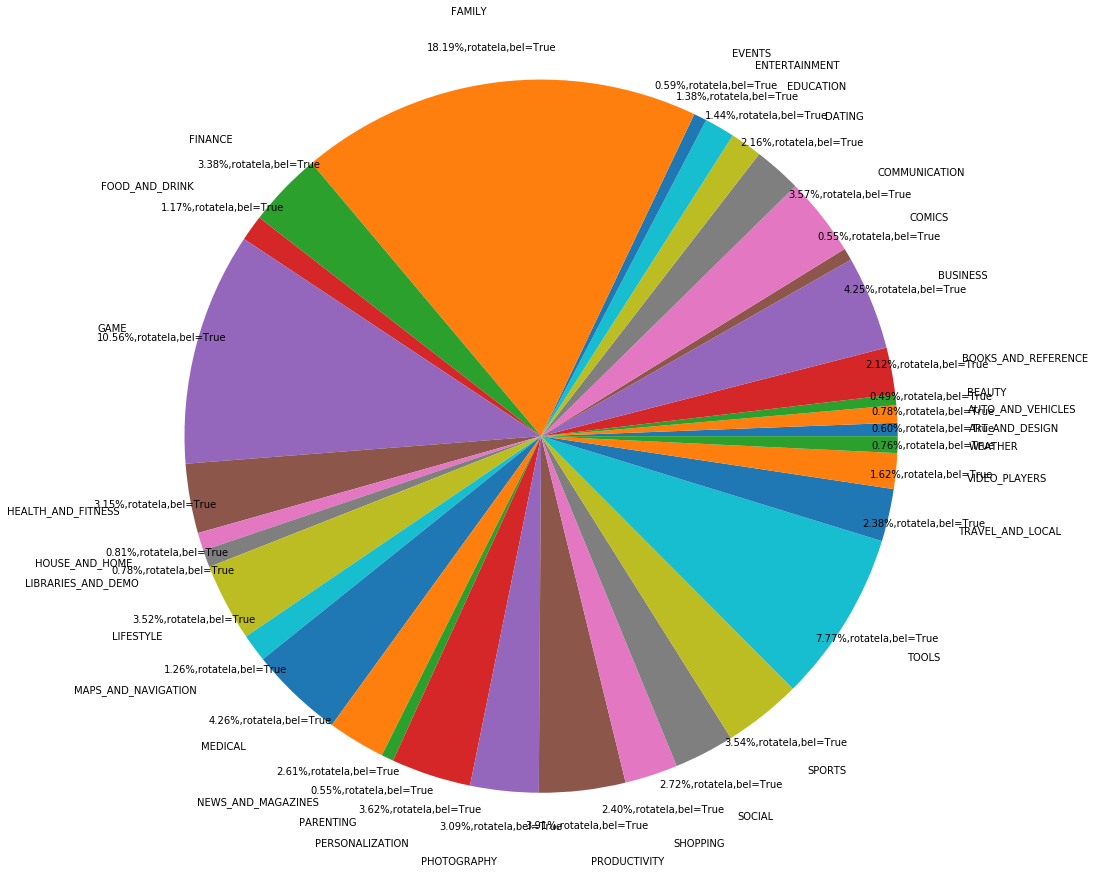

In [298]:
#1. What is the download rate by category?
value_category=np.zeros(33)
labels_category=df['Category'].unique()
for i in range(len(df['Category'])):
    try:
        value=df['Category'][i]
        num=dict_category[value]
        value_category[num]=value_category[num]+1
    except:
        pass
plt.axis("equal")
plt.pie(value_category,labels=labels_category,radius=4.1,autopct='%0.2f%%,rotatela,bel=True'
       ,pctdistance=1.1,labeldistance=1.2)
plt.show()

In [299]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
    the fractional area directly and the array will not be normalized. The
    resulting pie will have an empty wedge of size ``1 - sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : array-like
        The wedge sizes.
    
    explode : array-like, optional, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : list,

In [300]:
#What is the name of the 15 most downloaded applications? 


In [301]:
# What is the download rate for paid applications? 
paid_list=[]
#1st value=Paid
for j in labels_category:
    Paid_count=0
    for i in range(len(df['Type'])):
        try:
            if df['Category'][i]==j:
                if df['Type'][i]=="Paid":
                    Paid_count+=1
        except:
            pass
paid_list.append(Paid_count)
colors_paid=[]
Paid_colors=b # BLUE color
for i in range(int(len(paid_list)/2)):
    colors_paid_list.append(Paid_colors)
plt.bar(colors=b,alpha=0.7,width=0.25,align='edge',label='Paid_list')
plt.grid(True,linewidth=1,linestyle="--")
plt.show()
        
                    

NameError: name 'b' is not defined

In [ ]:
plt.bar([a-0.25 for a in monthlist],facecreamsalesdata,width=0.25,align='edge',label='Face Cream Sales Data')
plt.bar([a+0.25 for a in monthlist],facewashsalesdata,width=-0.25,align='edge',label='Face Wash Sales Data')
plt.xlabel('Month Number')
plt.ylabel('sales units in number')
plt.title('Facewash and facecream sales data')
plt.xticks(monthlist)
plt.yticks([0,500,1000,1500,2000,2500,3000,3500])
plt.legend(loc='upper left')
plt.grid(True,linewidth=1,linestyle="--")
plt.show()

In [ ]:
help(plt.bar)

In [ ]:
df.head()

In [ ]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).plot(kind='bar')

In [ ]:
#2. What is the name of the 15 most downloaded applications? 
df.groupby('App')['Installs'].sum().sort_values(ascending=False).head(15).plot(kind='bar')


In [ ]:
df.groupby('Type')['Installs'].sum().sort_values(ascending=False).plot(kind='bar')

In [ ]:
#5. What is the download rate and user rating by category?
df.groupby('Rating')['Installs'].sum().plot

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10838 entries, 0 to 3635
Data columns (total 13 columns):
App                   10838 non-null object
Category              10838 non-null object
Rating                10838 non-null float64
Reviews               10838 non-null int64
Size                  10838 non-null float64
Installs              10838 non-null float64
Type                  10838 non-null object
Price                 10838 non-null float64
Content Rating        10838 non-null object
Genres                10838 non-null object
Last Updated          10838 non-null object
Content Rating NUM    10838 non-null int32
Category NUM          10838 non-null int32
dtypes: float64(4), int32(2), int64(1), object(6)
memory usage: 1.4+ MB


In [360]:
#6. Apply Machine learning models?
from sklearn.model_selection import train_test_split

In [362]:
S=['Size','Installs','Price','Reviews']
X=df[S]
y=df.Rating

In [363]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [364]:
X.head()

,Size,Installs,Price,Reviews
0,19922944.0,10000.0,0.0,159
35,9646899.2,100000.0,0.0,564
36,25165824.0,500000.0,0.0,8145
37,0.0,5000000.0,0.0,36639
38,11534336.0,10000.0,0.0,158


In [365]:
X['Size'].unique()

array([1.99229440e+07, 9.64689920e+06, 2.51658240e+07, 0.00000000e+00,
       1.15343360e+07, 9.85661440e+06, 1.57286400e+07, 1.04857600e+07,
       1.25829120e+06, 1.25829120e+07, 2.72629760e+07, 8.38860800e+06,
       8.28375040e+06, 8.59832320e+06, 8.07403520e+06, 3.04087040e+06,
       3.77487360e+06, 2.62144000e+07, 3.87973120e+06, 6.18659840e+06,
       4.71859200e+06, 3.67001600e+06, 9.01775360e+06, 4.61373440e+06,
       5.87202560e+06, 4.40401920e+06, 1.99229440e+06, 5.45259520e+06,
       2.83115520e+06, 3.87973120e+07, 3.04087040e+07, 1.46800640e+07,
       9.12261120e+06, 2.93601280e+06, 2.20200960e+07, 2.09715200e+07,
       3.46030080e+07, 3.25058560e+06, 2.93601280e+07, 6.29145600e+06,
       6.39631360e+06, 7.34003200e+06, 4.82344960e+06, 2.41172480e+07,
       4.08944640e+07, 1.78257920e+07, 5.76716800e+06, 3.25058560e+07,
       6.60602880e+06, 9.22746880e+07, 1.67772160e+07, 1.01711872e+08,
       1.36314880e+07, 9.43718400e+06, 4.40401920e+07, 3.56515840e+07,
      

In [366]:
y.head()

0     4.1
35    3.8
36    4.7
37    4.1
38    4.7
Name: Rating, dtype: float64

In [367]:
X_train.shape

(8128, 4)

In [368]:
X_test.shape

(2710, 4)

In [369]:
from sklearn.preprocessing import StandardScaler


In [370]:
scaler=StandardScaler()

In [371]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [381]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [382]:
X_train[:6]

array([[-0.81882865, -0.18189625, -0.06846081, -0.15172529],
       [-0.81882875, -0.18189623, -0.06846081, -0.15172496],
       [-0.81882874, -0.18189625, -0.06846081, -0.1517253 ],
       [-0.81882874, -0.18189625, -0.06846081, -0.1517253 ],
       [-0.81882874, -0.18189625, -0.06846081, -0.1517253 ],
       [-0.81882866, -0.18189625, -0.06846081, -0.1517253 ]])

In [393]:
train_input=pd.read_csv('googleplaystore.csv')
test_input=pd.read_csv('googleplaystore.csv')


In [395]:
print(train_input.columns)
print(test_input.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [414]:
from sklearn import datasets,linear_model

In [415]:
regr=linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

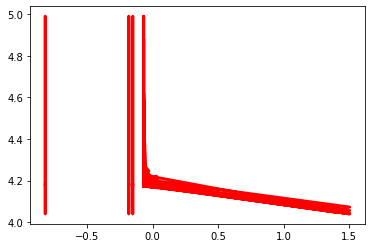

In [416]:
plt.plot(X_test,regr.predict(X_test),color='red',linewidth=3)
plt.show()